## A Starting Estimation from First Principles

If we know the geometry and make up of the pendulum with a reasonable degree of accuracy, we are able to calculate where the small mass should be position so that it will produce the same period in the SMU and SMD orientation.

<img src="KaterPendulum.png">

### Variable Definitions #

$M \rightarrow$ mass of large mass

$m \rightarrow$ mass of small mass

$M_{bar} \rightarrow$ mass of bar

$M_{T} = M + m + M_{bar} \rightarrow$ total mass of system

$L_{bar} \rightarrow$ length of bar

$g \rightarrow$ gravity

$R_m \rightarrow$ radius of small mass

$R_M \rightarrow$ radius of large mass

$\mathbb{R} \rightarrow$ radius of gyration

$\mathbb{I} \rightarrow$ moment of inertia




### Equation of Center of Mass
$x = \frac{M l_1 - m l_2}{M + m + M_{bar}}$

### Equations from the Pendulum Measurements
$D = h_1 + h_2$

$h_2 - x = \frac{D}{2}$

$h_1 + x = \frac{D}{2}$

Combining these equations results in:

$x = \frac{h_2 - h_1}{2}$

### Equations of Period and Moment of Inertia
$T_i^2 = \frac{4\pi^2}{g} \left(  \frac{\mathbb{I}_i}{M_{T} h_i} \right)$

where $i$ is either small-mass-up (smu) or small-mass-down (smd).

We define the radius of gyration of the system according to:

$\mathbb{I}^{cm}_{sys} = M_T \mathbb{R}^2$

and thus via the parallel axis theorem, we can write the moments of inertia in the two orientations as:

$\mathbb{I}_i = M_T \left( \mathbb{R}^2 + h_i^2 \right)$

Therefore,

$T_i^2 = \frac{4\pi^2}{g} \left( \frac{h_i^2+\mathbb{R}^2}{h_i} \right)$

If $T_1 = T_2$ then:

$\frac{h_1^2+\mathbb{R}^2}{h_1} = \frac{h_2^2+\mathbb{R}^2}{h_2}$

$h_1 h_2 = \mathbb{R}^2$


Now, we write the moment of inertia of the system as:

$\mathbb{I}_{cm}^{sys} = \mathbb{I}_{M}^{cm} + \mathbb{I}_{m}^{cm} + \mathbb{I}_{bar}^{cm}$

$\mathbb{I}_{M}^{cm} = \frac{1}{2} M R_M^2 + M\left( l_1 - x \right)^2$

$\mathbb{I}_{m}^{cm} = \frac{1}{2} m R_m^2 + m\left( l_2 + x \right)^2$

$\mathbb{I}_{bar}^{cm} = \mathbb{I}_{bar} + M_{bar} x^2$

$\mathbb{I}_{bar} = \frac{1}{12} M_{bar} L^2$

All of which result in:
$h_1 h_2 = \frac{1}{M+m+M_{bar}} \left[ \frac{1}{2} M R_M^2 + M\left( l_1 - x \right)^2 + \frac{1}{2} m R_m^2 + m\left( l_2 + x \right)^2 + \frac{1}{12} M_{bar} L^2 + M_{bar} x^2 \right]$

This is equation is difficult to solve analytically, so we will instead solve it numerically.  The goal is to find the value of $x$ that satisfies the equation.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

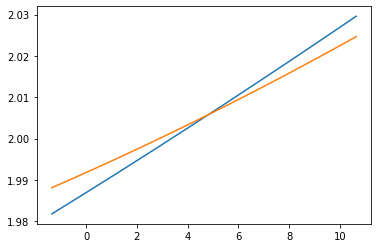

In [24]:
# Measured distances and masses
M=1.35928 # large mass
m=0.72705 # small mass
Mbar=2.90 # mass of bar (with small and large masses removed)
D=0.9986 # distance between knife-edge pivot points
L=1.523  # length of bar
g = 9.799 # value of g in Newport News

# Distance calculations
#
# The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
# The radius of the large mass is 4.7523 cm
# The radius of the small mass is 3.5 cm
RM = 0.047523
Rm = 0.035
offset = 0.0135
l1=D/2.0+RM+offset

# Find the value of x that satisfies the equation above

diff = 1.0E+99
olddiff = 1.0E+99
l2 = []
xpos = []
t1 = []
t2 = []
for i in range(1000):
    l2.append(D/2.0+Rm+(i/1000.0)*.12)
    xpos.append((l2[i]-offset-D/2-Rm)*100) # distance from the small mass to the knife-edge, in cm.
    x=(M*l1-m*l2[i])/(M+m+Mbar)
    h2=D/2.0+x
    h1=D/2.0-x
    lhs=h1*h2;
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2[i]+x)*(l2[i]+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    diff = lhs-rhs
    if (np.abs(diff)<olddiff):
        olddiff=diff
        index=i
    t1.append(2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1)))
    t2.append(2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2)))
    
#print (l2,t1,t2)
    
plt.plot(xpos,t1,label='Small Mass Down')
plt.plot(xpos,t2,label='Small Mass Up')
#plt.yscale("log")
plt.show()
